In [2]:
import pandas as pd
import seaborn as sb
import joblib
import matplotlib.pyplot as plt
import numpy as np
import truvari

In [3]:
data1 = joblib.load("s08_32x_stats.jl")
data1['coverage'] = '32x'
data2 = joblib.load("s08_16x_stats.jl")
data2['coverage'] = '16x'
data3 = joblib.load("s08_8x_stats.jl")
data3['coverage'] = '8x'

In [4]:
data = pd.concat([data1, data2, data3])

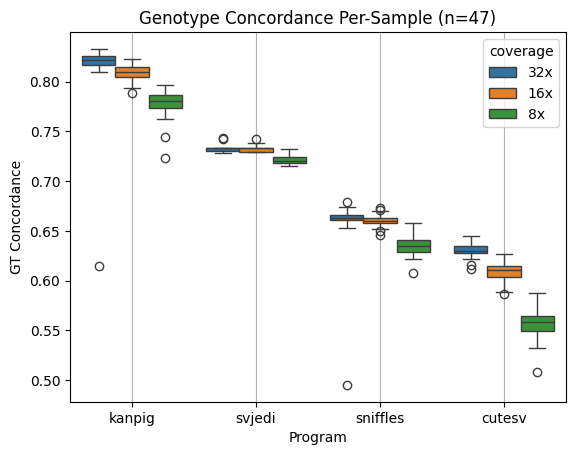

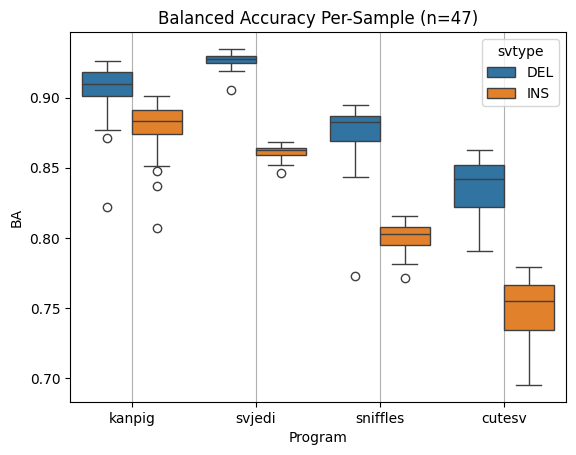

In [23]:
p = sb.boxplot(data=data[data['svtype'] == 'TOT'], x="Program", y="GT Concordance",
               hue="coverage", order=['kanpig', 'svjedi', 'sniffles', 'cutesv'], 
               hue_order=['32x', '16x', '8x'])
p.xaxis.grid(True)
p.set(title="Genotype Concordance Per-Sample (n=47)")
plt.show()

p = sb.boxplot(data=data[data['svtype'] != 'TOT'], x="Program", y="ba", 
           hue="svtype", order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
              hue_order=['DEL', 'INS'])
p.xaxis.grid(True)
p.set(title="Balanced Accuracy Per-Sample (n=47)", ylabel="BA")
plt.show()

In [11]:
in_data = joblib.load("s08_32x_gtmatrix.jl")

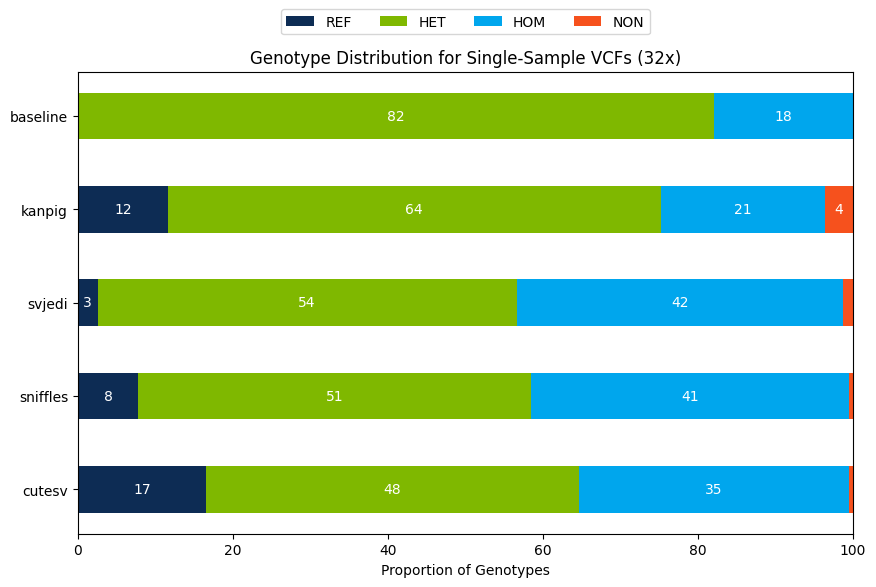

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import OrderedDict

# Example data for different tests and observations
tests = ['cutesv', 'sniffles', 'svjedi', 'kanpig']

m_data = OrderedDict()

# Bottom up order

m_data[('cutesv', 'pac')] = in_data['cutesv']['pac'].sum(axis=0)[:4]
m_data[('sniffles', 'pac')] = in_data['sniffles']['pac'].sum(axis=0)[:4]
m_data[('svjedi', 'pac')] = in_data['svjedi']['pac'].sum(axis=0)[:4]
m_data[('kanpig', 'pac')] = in_data['kanpig']['pac'].sum(axis=0)[:4]
#m_data[('svjedi', 'pac')][3] -= 1049772 # This manual correction needs to be stopped

m_data[('baseline', '')] = in_data['sniffles']['pac'].sum(axis=1)[:4]
#data[('exbaseline', '')] = [17937331 , 1079127, 233567, 0]

# Normalize the data by percentages for each test and observation
normalized_data = OrderedDict()
y_labels = []
y_super = []
for key, counts in m_data.items():
    total = np.sum(counts)
    normalized_data[key] = (counts / total) * 100

    y_labels.append(key[0])
    if key[1] not in y_super:
        y_super.append(key[1])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5
y_positions = np.arange(len(m_data))

# Define colors for each category
colors = ['#0D2C54', '#7FB800', '#00A6ED', '#F6511D']
categories = ['REF', 'HET', 'HOM', 'NON']

# Plot each test and observation
for i, ((test, observation), counts) in enumerate(normalized_data.items()):
    y_pos = i
    left = 0
    for j, (count, color, category) in enumerate(zip(counts, colors, categories)):
        ax.barh(y_pos, count, left=left, color=color, height=bar_width, label=category if y_pos == 0 else "")
        if count > 1.5:  # Only add text if the percentage is greater than 5
            ax.text(left + count / 2, y_pos, f'{count:.0f}', va='center', ha='center', color='white')
        left += count

# Adding labels and title
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_xlabel('Proportion of Genotypes')
ax.set_title('Genotype Distribution for Single-Sample VCFs (32x)')

# Adjusting the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(categories)], labels[:len(categories)], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(categories))

plt.show()


# Num Neigh

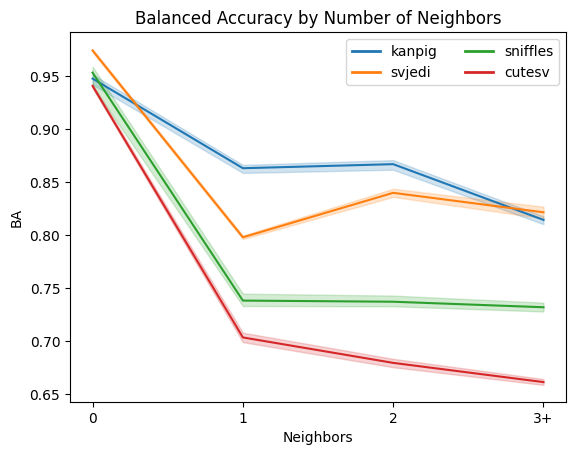

In [24]:

neigh_data = joblib.load("s08_32x_neigh_stats.jl")
lineplot = sb.lineplot(data=neigh_data.reset_index(), x="num_neigh", y="ba", 
                       hue="Program", style="Technology",
                      hue_order=['kanpig', 'svjedi', 'sniffles', 'cutesv'])

hue_labels = ['kanpig', 'svjedi', 'sniffles', 'cutesv']
#styles = ['solid', 'dashed']
#style_labels = neigh_data['Technology'].unique()

# Get handles and labels for both hue and style
handles, _ = lineplot.get_legend_handles_labels()

# Create legend elements
hue_elements = [plt.Line2D([0], [0], color=sb.color_palette()[i], lw=2) for i in range(len(hue_labels))]
#style_elements = [plt.Line2D([0], [0], color='black', linestyle=styles[i], lw=2) for i in range(len(style_labels))]

# Combine elements
legend_elements = hue_elements #+ style_elements
legend_labels = list(hue_labels) #+ list(style_labels)

lineplot.set_xticks([0, 1, 2, 3])
lineplot.set_xticklabels(["0", "1", "2", "3+"])
lineplot.set(title="Balanced Accuracy by Number of Neighbors", xlabel="Neighbors", ylabel="BA")
# Create custom legend
plt.legend(legend_elements, legend_labels, title='', ncol=2)#, bbox_to_anchor=(1.05, 1), loc='upper left')


In [17]:
s = neigh_data[(neigh_data['sample'] == 'HG00438') 
          & (neigh_data['Program'] == 'kanpig')][['num_neigh', 'Total Calls']]

In [20]:
s['percent of calls'] = s['Total Calls'] / s['Total Calls'].sum()
s

,num_neigh,Total Calls,percent of calls
20,0,12633,0.515485
21,1,6884,0.280899
22,2,2288,0.093361
23,3,2702,0.110254
